In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [6]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[ 7.24687124, -1.72957801],
       [ 6.52173527, -1.53800758],
       [ 5.38523158,  0.19928215],
       ...,
       [ 7.36339038,  3.93261924],
       [ 6.82268117,  0.58739989],
       [11.16033107,  3.61338473]], shape=(1000, 2))

In [4]:
y

array([2, 0, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 1, 0, 0, 1, 2, 2, 0, 1, 1, 0,
       2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 1, 0,
       1, 2, 0, 1, 0, 0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 0,
       1, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1,
       0, 1, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 0, 1, 0, 0, 1, 2, 1, 1, 1, 0, 0,
       1, 0, 2, 1, 2, 0, 1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 1,
       0, 1, 1, 1, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 0,
       2, 1, 1, 2, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 1, 2, 0, 0,
       0, 0, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 2, 0, 2, 0, 1, 2, 2, 1, 0, 1, 2, 2, 2, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 2, 0, 2, 2, 2, 1, 0, 2, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2, 0,
       1, 0, 0, 1, 0, 2, 2, 2, 0, 2, 1, 1, 0, 1, 2, 2, 0, 1, 1, 0, 1, 2,
       2, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 2, 1, 0, 1,

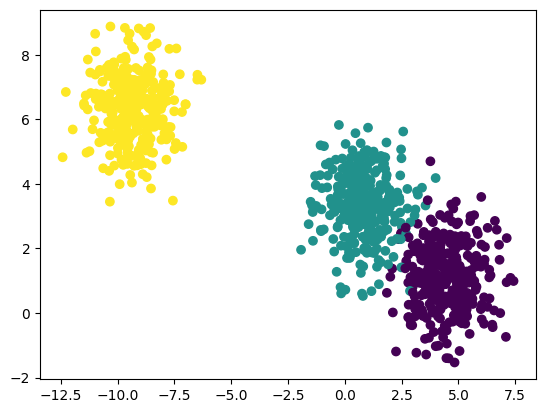

In [7]:
plt.scatter(X[:,0],X[:,1],c=y)

In [8]:
## standardization--feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [11]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [12]:
from sklearn.cluster import KMeans

In [13]:
## Elbow method To select K Value
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [14]:
wcss

[1340.0000000000011,
 270.65134298027107,
 124.37524514776236,
 101.61101415640374,
 77.38048990198762,
 71.25905615921673,
 70.70105454988854,
 48.2638901289726,
 41.89819020797072,
 38.616009991703166]

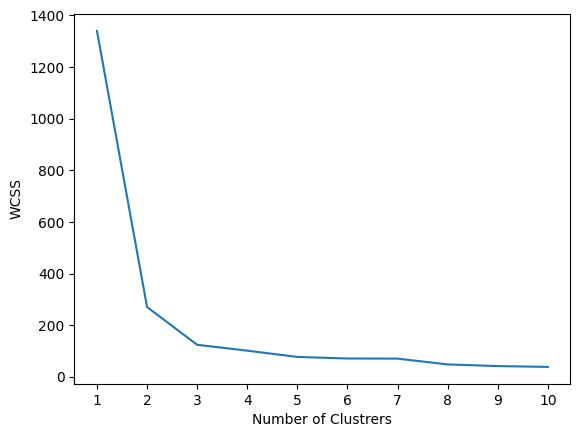

In [15]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [16]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [17]:
kmeans.fit_predict(X_train_scaled)

array([0, 2, 0, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 2, 2, 0, 1, 2, 0, 0, 0, 2,
       0, 2, 1, 0, 2, 2, 0, 2, 2, 1, 1, 1, 1, 2, 0, 0, 1, 0, 1, 2, 2, 1,
       2, 0, 2, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2,
       0, 2, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 0, 2, 1, 0,
       1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 2, 0, 2, 0, 1, 2, 2, 0, 0,
       0, 2, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 2, 1, 0,
       1, 0, 0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 2,
       0, 0, 2, 1, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 1,
       1, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 0, 0, 2, 0, 1, 0, 2, 1, 2,
       0, 0, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 1, 0, 2, 1, 0, 0, 1, 0, 2,
       0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 2,

In [18]:
y_pred=kmeans.predict(X_test_scaled)

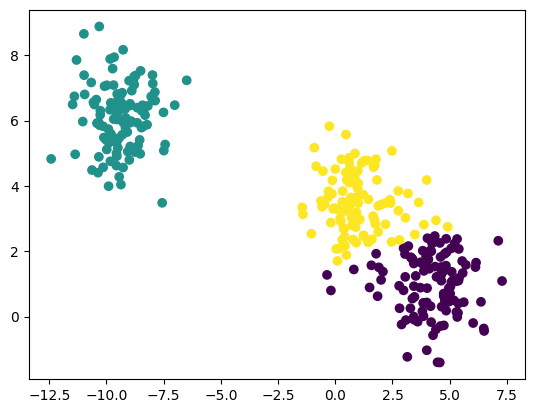

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [20]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [21]:
## kneelocator
!pip install kneed

In [22]:
from kneed import KneeLocator

In [23]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [24]:
kl.elbow

np.int64(3)

In [25]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [26]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [27]:
silhouette_coefficients

[0.7115010227386714,
 0.6114540438004699,
 0.5073973887510017,
 0.42661552799914826,
 0.40215199642266214,
 0.3932001004984621,
 0.364701318791263,
 0.37698933813093144,
 0.3542730777521315]

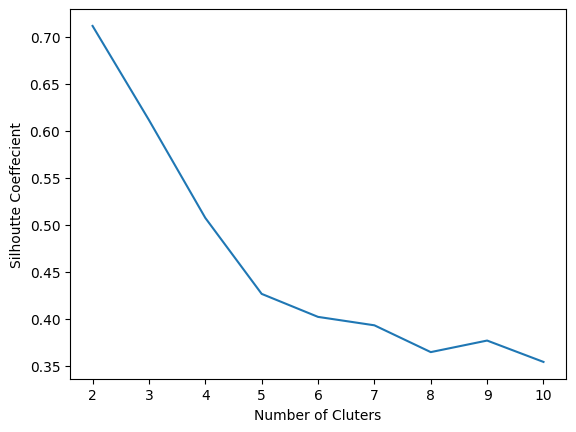

In [28]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()